# Campos escalares y vectoriales

## Matplotlib: anatomía de una figura.

![hello](https://matplotlib.org/stable/_images/anatomy.png)

**Matplotlib** es una biblioteca de Python multiplataforma para generar gráficos (plots) en dos dimensiones con las siguientes características: 

* Se puede usar en una variedad de ámbitos:
    - Scripts de Python, Shells de IPython, Notebooks de Jupyter, Aplicaciones para Web e Interfaces Gráficas de Usuario (GUI). 
* Se puede usar para desarrollar aplicaciones profesionales.
* Puede generar varios tipos de formatos de figuras y videos:
    - png, jpg, svg, pdf, mp4, ...
* Tiene un soporte limitado para realizar figuras en 3D.
* Puede combinarse con otras bibliotecas y aplicaciones para extender su funcionalidad.

**Arquitectura** de tres capas:
* **Scripting**: API para crear gráficas.
    - Provee de una interfaz simple para crear gráficas.
    - Está orientada a usuarios sin mucha experiencia en la programación.
    - Es lo que se conoce como el API de pyplot.
* **Artist**: Hace el trabajo interno de creación de los elementos de la gráfica.
   - Los Artist (¿artesanos?) dibujan los elementos de la gráfica.
   - Cada elemento que se ve en la gráfica es un Artist.
   - Provee de un API orientado a objetos muy flexible.
   - Está orientado a programadores expertos para crear aplicaciones complejas.
* **Backend**: El lugar donde se despliega la gráfica. Las gráficas se envían a un dispositivo de salida. Puede ser cualquier interfaz que soporta Matplotlib:
   - User interface backends (interactive backends): pygtk, wxpython, tkinter, qt4, macosx, … 
   - Hard-copy backends (non-interactive backends): .png, .svg, .pdf, .ps

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import macti.visual as mvis
from mpl_toolkits.axes_grid1 import make_axes_locatable

# TODO: hacer este cambio en macti.visual
plt.rcParams['axes.grid'] = False

In [2]:
# Se crea una figura vacía, sin ejes.
fig = plt.figure()  

<Figure size 640x480 with 0 Axes>

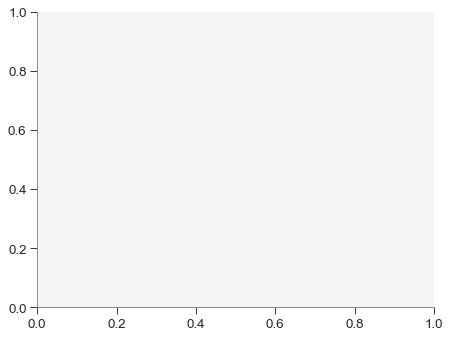

In [5]:
# Se crea una figura con un conjunto de ejes
fig, ax = plt.subplots()  

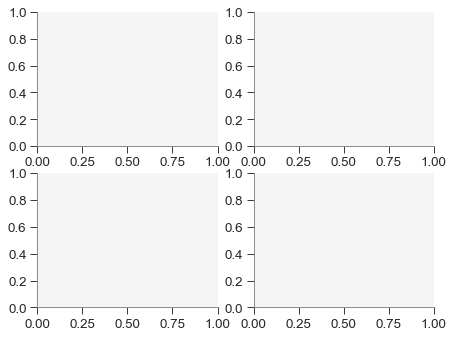

In [6]:
# Se crea una figura con una "rejilla" de ejes de 2x2
fig, axs = plt.subplots(2, 2)  

## Definición de una malla

In [7]:
# Tamaño del dominio
Lx = 2.0
Ly = 1.0

# Número de nodos en cada eje
Nx = 9
Ny = 4

# Tamaño de la malla en cada dirección
hx = Lx / (Nx+1)
hy = Ly / (Ny+1)

print('hx = {}, hy = {}'.format(hx, hy))

hx = 0.2, hy = 0.2


In [8]:
# Número total de nodos incluyendo las fronteras
NxT = Nx + 2
NyT = Ny + 2

# Coordenadas de la malla
xn = np.linspace(0,Lx,NxT)
yn = np.linspace(0,Ly,NyT)

print('Total de nodos en x = {}, en y = {}'.format(NxT, NyT))
print('Coordenadas en x : {}'.format(xn))
print('Coordenadas en y : {}'.format(yn))

Total de nodos en x = 11, en y = 6
Coordenadas en x : [0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2. ]
Coordenadas en y : [0.  0.2 0.4 0.6 0.8 1. ]


In [9]:
# Generación de una rejilla
xg, yg = np.meshgrid(xn, yn, indexing='ij')

print(xg)
print(yg)

[[0.  0.  0.  0.  0.  0. ]
 [0.2 0.2 0.2 0.2 0.2 0.2]
 [0.4 0.4 0.4 0.4 0.4 0.4]
 [0.6 0.6 0.6 0.6 0.6 0.6]
 [0.8 0.8 0.8 0.8 0.8 0.8]
 [1.  1.  1.  1.  1.  1. ]
 [1.2 1.2 1.2 1.2 1.2 1.2]
 [1.4 1.4 1.4 1.4 1.4 1.4]
 [1.6 1.6 1.6 1.6 1.6 1.6]
 [1.8 1.8 1.8 1.8 1.8 1.8]
 [2.  2.  2.  2.  2.  2. ]]
[[0.  0.2 0.4 0.6 0.8 1. ]
 [0.  0.2 0.4 0.6 0.8 1. ]
 [0.  0.2 0.4 0.6 0.8 1. ]
 [0.  0.2 0.4 0.6 0.8 1. ]
 [0.  0.2 0.4 0.6 0.8 1. ]
 [0.  0.2 0.4 0.6 0.8 1. ]
 [0.  0.2 0.4 0.6 0.8 1. ]
 [0.  0.2 0.4 0.6 0.8 1. ]
 [0.  0.2 0.4 0.6 0.8 1. ]
 [0.  0.2 0.4 0.6 0.8 1. ]
 [0.  0.2 0.4 0.6 0.8 1. ]]


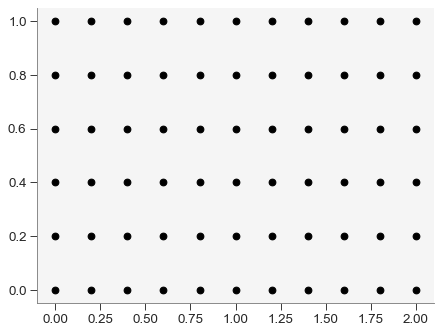

In [10]:
# Dibujamos los puntos de la malla
plt.scatter(xg,yg)
plt.show()

Lo que hemos hecho hasta ahora es usar pyplot (`plt`) para realizar las gráficas. Vayamos un nivel más abajo para tener más control. Esto permitirá construir varias subgráficas, cada una con sus propios ejes.

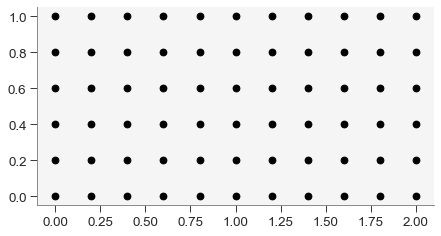

In [11]:
# Obtenemos los ejes de la figura actual
ax = plt.gca()

# Razón de aspecto de la figura
ax.set_aspect('equal')

# Se grafican los puntos de la malla
ax.scatter(xg,yg)

plt.show()

Usando las funciones `vlines` y `hlines` es posible dibujar líneas verticales y horizontales; con ellas podemos dibujar el dominio de la malla (un rectángulo).

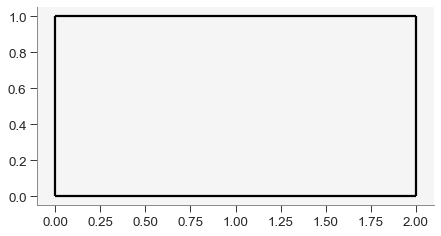

In [12]:
ax = plt.gca()
ax.set_aspect('equal')

# Dibujamos dos líneas verticales
ax.vlines(xn[0], ymin=yn[0], ymax=yn[-1])
ax.vlines(xn[-1], ymin=yn[0], ymax=yn[-1])

# Dibujamos dos líneas horizontales
ax.hlines(yn[0], xmin=xn[0], xmax=xn[-1])
ax.hlines(yn[-1], xmin=xn[0], xmax=xn[-1])

plt.show()

Si vamos un poco más allá, podemos usar nuevamente las funciones `vlines` y `hlines` para dibujar la malla; lo anterior se logra mediante el uso de ciclos `for`.

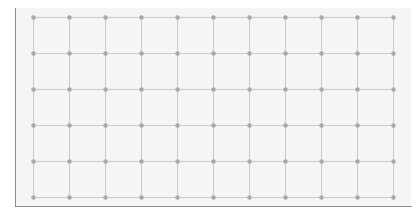

In [13]:
ax = plt.gca()
ax.set_aspect('equal')

# Elminamos las marcas sobre los ejes
ax.set_xticks([])
ax.set_yticks([])
    
# Dibujamos todas las líneas verticales de la malla
for xi in xn:
    ax.vlines(xi, ymin=yn[0], ymax=yn[-1], lw=0.5, color='darkgray')

# Dibujamos todas las líneas horizontales de la malla
for yi in yn:
    ax.hlines(yi, xmin=xn[0], xmax=xn[-1], lw=0.5, color='darkgray')

# Dibujamos un punto en cada nodo de la malla
ax.scatter(xg,yg, marker='.', color='darkgray')

plt.show()

Con lo aprendido hasta ahora, podemos definir tres funciones:
- `set_axes()` : para configurar los ejes de la figura.
- `plot_mesh()` : para dibujar la malla.
- `plot_frame()` : para dibujar el contorno de la malla (las fronteras).

In [14]:
def set_axes(ax):
    """
    Configura la razón de aspecto, quita las marcas de los ejes y el marco.
    
    Parameters
    ----------
    ax: axis
    Ejes que se vana configurar.
    """
    ax.set_aspect('equal') 
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
def plot_mesh(ax, xg, yg):
    """
    Dibuja la malla del dominio.
    
    Paramters
    ---------
    ax: axis
    Son los ejes donde se dibujará la malla.
    
    xn: np.array
    Coordenadas en x de la malla.
    
    yn: np.array
    Coordenadas en y de la malla.
    """
    set_axes(ax)
    
    xn = xg[:,0]
    yn = yg[0,:]
    for xi in xn:
        ax.vlines(xi, ymin=yn[0], ymax=yn[-1], lw=0.5, color='darkgray')
        
    for yi in yn:
        ax.hlines(yi, xmin=xn[0], xmax=xn[-1], lw=0.5, color='darkgray')
        
    ax.scatter(xg, yg, marker='.', color='darkgray')
    
def plot_frame(ax, xn, yn, lw = 0.5, color = 'k'):
    """
    Dibuja el recuadro de la malla.
    
    Paramters
    ---------
    ax: axis
    Son los ejes donde se dibujará la malla.
    
    xn: np.array
    Coordenadas en x de la malla.
    
    yn: np.array
    Coordenadas en y de la malla.
    """
    set_axes(ax)
    
    # Dibujamos dos líneas verticales
    ax.vlines(xn[0], ymin=yn[0], ymax=yn[-1], lw = lw, color=color)
    ax.vlines(xn[-1], ymin=yn[0], ymax=yn[-1], lw = lw, color=color)

    # Dibujamos dos líneas horizontales
    ax.hlines(yn[0], xmin=xn[0], xmax=xn[-1], lw = lw, color=color)
    ax.hlines(yn[-1], xmin=xn[0], xmax=xn[-1], lw = lw, color=color)

Ahora usamos la funciones anteriores para dibujar la malla junto con su contorno.

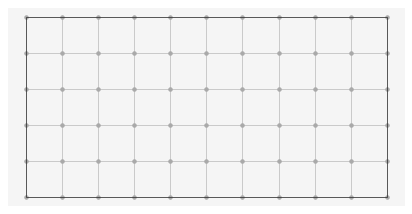

In [15]:
ax = plt.gca()

# Ejecutamos la función plot_mesh(...)
plot_mesh(ax, xg, yg)

# Dibujamos el recuadro con la función plot_fame(...)
plot_frame(ax, xn, yn)

## Definición de un campo escalar

Un campo escalar en 2D, es una función que para cada par $(x,y)$ define un solo valor. Matemáticamente tenemos:

$$
f(x,y) : \mathbb{R}^2 \to \mathbb{R}
$$

Definimos el campo escalar $T(x,y)$ en la malla que hemos construido antes como sigue:

In [16]:
# Definición de un campo escalar en cada punto de la malla
T = np.zeros((NxT, NyT))

# Asignamos un valor a cada entrada del arreglo
for i in range(NxT):
    for j in range(NyT):
        T[i,j] = np.sin(i*j)
        
print('Campo escalar T:\n {}'.format(T))

Campo escalar T:
 [[ 0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.84147098  0.90929743  0.14112001 -0.7568025  -0.95892427]
 [ 0.          0.90929743 -0.7568025  -0.2794155   0.98935825 -0.54402111]
 [ 0.          0.14112001 -0.2794155   0.41211849 -0.53657292  0.65028784]
 [ 0.         -0.7568025   0.98935825 -0.53657292 -0.28790332  0.91294525]
 [ 0.         -0.95892427 -0.54402111  0.65028784  0.91294525 -0.13235175]
 [ 0.         -0.2794155  -0.53657292 -0.75098725 -0.90557836 -0.98803162]
 [ 0.          0.6569866   0.99060736  0.83665564  0.27090579 -0.42818267]
 [ 0.          0.98935825 -0.28790332 -0.90557836  0.55142668  0.74511316]
 [ 0.          0.41211849 -0.75098725  0.95637593 -0.99177885  0.85090352]
 [ 0.         -0.54402111  0.91294525 -0.98803162  0.74511316 -0.26237485]]


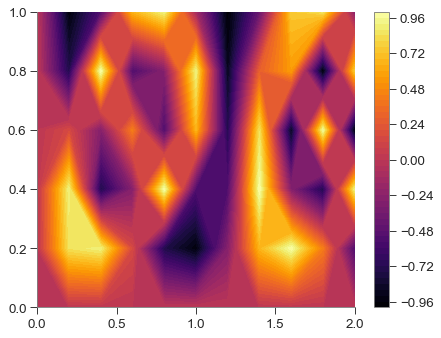

In [17]:
ax = plt.gca()

# Hacemos una gráfica de contornos "llenos" del campo escalar.
c = ax.contourf(xg, yg, T, levels=50, cmap='inferno')

# Creamos una barra de color
plt.colorbar(c)
plt.show()

Lo interesante sería dibujar también la malla junto con el campo escalar. Eso lo hacemos como siguue:

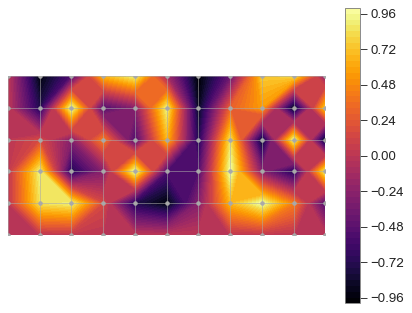

In [18]:
ax = plt.gca()

# Hacemos una gráfica de contornos "llenos" del campo escalar.
c = ax.contourf(xg, yg, T, levels=50, cmap='inferno')

# Se dibuja la malla
plot_mesh(ax, xg, yg)

plt.colorbar(c)
plt.show()

En la gráfica anterior, la barra de color es muy grande. Esto se puede ajustar como sigue

In [ ]:
ax = plt.gca()
ax.set_aspect('equal')

# Definimos los límites de los ejes
lmax = max(Lx,Ly)   # El máximo entre Lx y Ly
offx = lmax * 0.01  # Definimos una pequeña compensación 
offy = lmax * 0.01  # para hacer la gráfica, igual en ambas direcciones
ax.set_xlim(-offx, Lx+offx) # Definimos los límites
ax.set_ylim(-offy, Ly+offy) # de la gráfica

# Creamos un espacio fijo para la barra (unos ejes espaciales)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", "5%", pad="3%")
cax.set_xticks([])
cax.set_yticks([])
cax.spines['bottom'].set_visible(False)
cax.spines['left'].set_visible(False)

# Dibujamos el campo escalar y la malla
c = ax.contourf(xg, yg, T, levels=50, cmap='inferno')
plot_mesh(ax, xg, yg)

# Dibujamos la barra de color en los ejes cax
fig = plt.gcf()
fig.colorbar(c, cax=cax, ticks=[-0.9, 0.0, 0.9], orientation='vertical')

plt.show()

Encapsulamos el código anterior en la función `set_canvas()`.

In [ ]:
def set_canvas(ax, Lx, Ly):
    """
    Configura un lienzo para hacer las gráficas más estéticas.
    
    Parameters
    ----------
    ax: axis
    Son los ejes que se van a configurar.
    
    Lx: float
    Tamaño del dominio en dirección x.
    
    Ly: float
    Tamaño del dominio en dirección y.
    
    Returns
    -------
    cax: axis
    Eje donde se dibuja el mapa de color.
    """
    set_axes(ax)

    lmax = max(Lx,Ly)
    offx = lmax * 0.01
    offy = lmax * 0.01
    ax.set_xlim(-offx, Lx+offx)
    ax.set_ylim(-offy, Ly+offy)
    ax.grid(False)
    
    ax.set_aspect('equal')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", "5%", pad="3%")
    cax.set_xticks([])
    cax.set_yticks([])
    cax.spines['bottom'].set_visible(False)
    cax.spines['left'].set_visible(False)
    
    return cax

In [ ]:
# Probamos la función set_canvas(...)
ax = plt.gca()
set_canvas(ax, Lx, Ly)

plt.show()

Observa que se muestra un "lienzo" vacío donde podemos realizar nuestra gráfica. Por ejemplo, podemos dibujar la malla:

In [ ]:
# Ahora dibujamos la malla dentro del canvas.
ax = plt.gca()
cax = set_canvas(ax, Lx, Ly)
plot_mesh(ax, xg, yg)

Y también podemos dibujar la malla, el campo escalar y la barra de color en el lienzo:

In [ ]:
# Ahora dibujamos el campo escalar y la malla
ax = plt.gca()
cax = set_canvas(ax, Lx, Ly)

c = ax.contourf(xg, yg, T, levels=50, cmap='inferno')

# Aquí se dibuja la barra de color en los ejes cax.
fig.colorbar(c, cax=cax, ticks=[-0.9, 0.0, 0.9], orientation='vertical')

plot_mesh(ax, xg, yg)

Finalmente, podemos graficar una porción del campo escalar, por ejemplo en una línea para $y$ =constante o en una línea para $x$ 0 constante. Veamos:

In [ ]:
# Hacemos una gráfica de T para y = constante
ax = plt.gca()
ax.plot(xn,T[:,1])
ax.set_xlabel('$x$')
ax.set_ylabel('$T$')
plt.show()

In [ ]:
# Hacemos una gráfica de T para x = constante
ax = plt.gca()
ax.plot(yn,T[1,:])
ax.set_xlabel('$y$')
ax.set_ylabel('$T$')
plt.show()

Definimos ahora algunos valores sobre la frontera del dominio.

In [ ]:
T[: ,-1] = 1.0 # TOP
T[-1, :] = 1.0 # RIGHT
T[0 , :] = 1.0 # LEFT
T[: , 0] = 1.0 # BOTTOM

In [ ]:
ax = plt.gca()
cax = set_canvas(ax, Lx, Ly)

c = ax.contourf(xg, yg, T, levels=50, cmap='inferno')
plot_mesh(ax, xg, yg)

fig.colorbar(c, cax=cax, ticks=[-0.9, 0.0, 0.9], orientation='vertical')
plt.show()

In [ ]:
# Un punto especiales en el dominio (comienza en 20 y reduce a 2.5)
T[NxT//3, NyT//3] = 20

In [ ]:
ax = plt.gca()
cax = set_canvas(ax, Lx, Ly)

c = ax.contourf(xg, yg, T, levels=50, cmap='inferno')
plot_mesh(ax, xg, yg)

fig.colorbar(c, cax=cax, ticks=[-0.9, 0.0, 0.9], orientation='vertical')
plt.show()

## Definición de un campo vectorial

Un campo vectorial en 2D, es una función que para cada par $(x,y)$ define dos valores. Matemáticamente tenemos:

$$
\vec{V}(x,y) : \mathbb{R}^2 \to \mathbb{R}^2
$$

donde $(x,y)$ representa las coordenadas de un punto en $\mathbb{R}^2$. La función vectorial la definimos como $\vec{V}(x,y) = (v_x,v_y)$, donde $v_x$ y $v_y$ son dos funciones que dependen de la posición $(x,y)$.


Ahora, vamos a definir el campo vectorial $\vec{V}(x,y)$ en la malla que hemos construido antes.

In [ ]:
# Definición del campo vectorial (en este caso dos valores por nodo)
v = np.zeros((2, NxT, NyT))

# Creamos un campo vectorial con las siguientes fórmulas
A = 1.0
alpha_x = 1.0
alpha_y = 1.0

# Primera componente del campo vectorial
v[0] = -A * np.cos(np.pi * alpha_y * yg / Ly) * np.sin(np.pi * alpha_x * xg / Lx)

# Segunda componente del campo vectorial
v[1] =  A * np.sin(np.pi * alpha_y * yg / Ly) * np.cos(np.pi * alpha_x * xg / Lx)

print('Componente x del campo vectorial:\n {}'.format(v[0]))
print('Componente y del campo vectorial:\n {}'.format(v[1]))

Vamos a graficar cada componente de la velocidad como si fuesen campos escalares independientes

In [ ]:
ax = plt.gca()
cax = set_canvas(ax, Lx, Ly)

# Componente x del campo vectorial
c = ax.contourf(xg, yg, v[0], levels=50, cmap='viridis')
fig.colorbar(c, cax=cax, ticks=[-0.9, 0.0, 0.9], orientation='vertical')

plot_mesh(ax, xg, yg)

In [ ]:
ax = plt.gca()
cax = set_canvas(ax, Lx, Ly)

# Componente y del campo vectorial
c = ax.contourf(xg, yg, v[1], levels=50, cmap='viridis')
fig.colorbar(c, cax=cax, ticks=[-0.9, 0.0, 0.9], orientation='vertical')

plot_mesh(ax, xg, yg)
plt.show()

## Subgráficas en una sola figura.

Ahora vamos a graficar las dos componentes de la velocidad en una sola figura, pero en dos subgráficas (subplots).

In [ ]:
# Definimos dos subgráficas: 2 renglones y 1 columna
fig, (ax1, ax2) = plt.subplots(2,1)

# Primera subgráfica
# ----------------------
## Definición del lienzo
cax1 = set_canvas(ax1, Lx, Ly)

## Graficación de la componente x del campo escalar sobre la malla
cu = ax1.contourf(xg, yg, v[0], levels=50, cmap='viridis')
fig.colorbar(cu, cax=cax1, ticks=[-0.9, 0.0, 0.9], orientation='vertical')
plot_mesh(ax1, xg, yg)

# Segunda subgráfica
# ----------------------
## Definición del lienzo
cax2 = set_canvas(ax2, Lx, Ly)

## Graficación de la componente x del campo escalar sobre la malla
cu = ax2.contourf(xg, yg, v[1], levels=50, cmap='viridis')
fig.colorbar(cu, cax=cax2, ticks=[-0.9, 0.0, 0.9], orientation='vertical')
plot_mesh(ax2, xg, yg)

plt.show()

Ahora graficamos el campo escalar $T(x,y)$ y el campo vectorial $\vec{V}(x,y)$, este último usando vectores.

In [ ]:
fig, (ax1, ax2) = plt.subplots(2,1)

# Primera subgráfica
# ----------------------
## Definición del lienzo
cax1 = set_canvas(ax1, Lx, Ly)

## Graficación del campo escalar T sobre la malla
cu = ax1.contourf(xg, yg, T, levels=50, cmap='inferno')
fig.colorbar(cu, cax=cax1, ticks=[-0.9, 0.0, 0.9], orientation='vertical')
plot_mesh(ax1, xg, yg)

# Segunda subgráfica
# ----------------------
## Definición del lienzo
cax2 = set_canvas(ax2, Lx, Ly)

## Graficación del campo vectorial V sobre la malla
cu = ax2.quiver(xg, yg, v[0], v[1])
plot_mesh(ax2, xg, yg)

plt.show()

Finalmente, realizamos cuatro subgráficas.

In [ ]:
# Creación de tres gráficas
fig, ax = plt.subplots(2,2, figsize=(10,10))

# Primera gráfica: la malla
cax0 = set_canvas(ax[0, 0], Lx, Ly)
plot_mesh(ax[0,0], xg, yg)

# Segunda gráfica: campo escalar T
cax1 = set_canvas(ax[0,1], Lx, Ly)
cu = ax[0,1].contourf(xg, yg, T, levels=50, cmap='inferno')
fig.colorbar(cu, cax=cax1, ticks=[-0.9, 0.0, 0.9], orientation='vertical')

# Tercera gráfica: campo vectorial V
cax2 = set_canvas(ax[1,0], Lx, Ly)
cu = ax[1,0].quiver(xg, yg, v[0], v[1])
plot_frame(ax[1,0], xn, yn)

# Cuarta gráfica: Temperatura en x = constante
ax[1,1].plot(xn,T[:,1])
ax[1,1].set_xlabel('$x$')
ax[1,1].set_ylabel('$T$')

plt.tight_layout()
plt.savefig('figura.pdf')
plt.show()